<a href="https://colab.research.google.com/github/adamyie/python_studies_projects/blob/main/Failed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

## **Please import forecast_history.csv file into the notebook beforehand.**

In [74]:
fchist_df = pd.read_csv('forecast_history.csv')
fchist_df.head()
fchist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    14 non-null     int64  
 1   Median house price            14 non-null     object 
 2   Westpac: 4 year forecast      13 non-null     float64
 3   Joe Bloggs: 2 year forecast   14 non-null     float64
 4   Harry Spent: 5 year forecast  13 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 688.0+ bytes


In [111]:
# prompt: I need to drop all the ',' inside the 'Median house price' column ONLY, how?

fchist_df['Median house price'] = fchist_df['Median house price'].str.replace(',', '')
fchist_df['Median house price'] = fchist_df['Median house price'].astype(float)

AttributeError: Can only use .str accessor with string values!

In [96]:
fchist_df_Westpac = fchist_df[['Unnamed: 0','Median house price', 'Westpac: 4 year forecast']].copy()

In [97]:
fchist_df_Westpac.head()

,Unnamed: 0,Median house price,Westpac: 4 year forecast
0,2011,340000.0,0.56
1,2012,370000.0,0.53
2,2013,350000.0,NaN
3,2014,420000.0,0.13
4,2015,425000.0,0.33


In [98]:
clean_Westpac = fchist_df_Westpac.dropna()

In [99]:
clean_Westpac.head()

,Unnamed: 0,Median house price,Westpac: 4 year forecast
0,2011,340000.0,0.56
1,2012,370000.0,0.53
3,2014,420000.0,0.13
4,2015,425000.0,0.33
5,2016,500000.0,-0.05


In [100]:
fchist_df_Bloggs = fchist_df[['Unnamed: 0','Median house price', 'Joe Bloggs: 2 year forecast']].copy()

In [101]:
fchist_df_Bloggs.head()

,Unnamed: 0,Median house price,Joe Bloggs: 2 year forecast
0,2011,340000.0,0.23
1,2012,370000.0,0.34
2,2013,350000.0,0.19
3,2014,420000.0,0.42
4,2015,425000.0,0.23


In [102]:
clean_Bloggs = fchist_df_Bloggs.dropna()

In [103]:
fchist_df_Spent = fchist_df[['Unnamed: 0','Median house price', 'Harry Spent: 5 year forecast']].copy()

In [104]:
fchist_df_Spent.head()

,Unnamed: 0,Median house price,Harry Spent: 5 year forecast
0,2011,340000.0,-0.2
1,2012,370000.0,-0.8
2,2013,350000.0,-0.7
3,2014,420000.0,-0.8
4,2015,425000.0,-0.5


In [105]:
clean_Spent = fchist_df_Spent.dropna()

In [106]:
clean_Westpac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 13
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                13 non-null     int64  
 1   Median house price        13 non-null     float64
 2   Westpac: 4 year forecast  13 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 416.0 bytes


In [109]:
clean_Westpac['Price Increase'] = clean_Westpac['Median house price'] * clean_Westpac['Westpac: 4 year forecast']
clean_Bloggs['Price Increase'] = clean_Bloggs['Median house price'] * clean_Bloggs['Joe Bloggs: 2 year forecast']
clean_Spent['Price Increase'] = clean_Spent['Median house price'] * clean_Spent['Harry Spent: 5 year forecast']

<ipython-input-109-2f424a0f1aa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_Westpac['Price Increase'] = clean_Westpac['Median house price'] * clean_Westpac['Westpac: 4 year forecast']
<ipython-input-109-2f424a0f1aa3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_Spent['Price Increase'] = clean_Spent['Median house price'] * clean_Spent['Harry Spent: 5 year forecast']


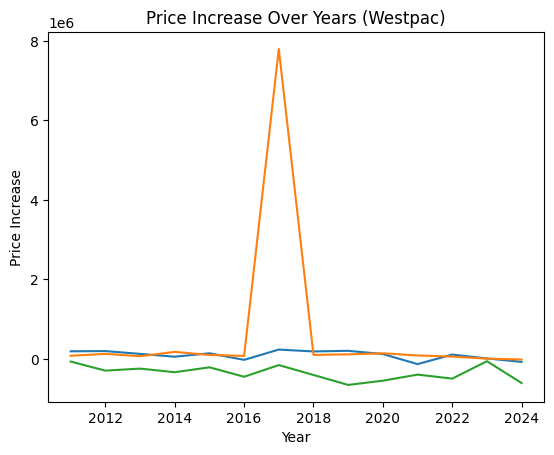

In [110]:
# prompt: plot line graph from clean_Westpac on "Unnamed: 0" as X with label "Year" and "Price Increase" as Y

import matplotlib.pyplot as plt
plt.plot(clean_Westpac['Unnamed: 0'], clean_Westpac['Price Increase'])
plt.plot(clean_Bloggs['Unnamed: 0'], clean_Bloggs['Price Increase'])
plt.plot(clean_Spent['Unnamed: 0'], clean_Spent['Price Increase'])
plt.xlabel('Year')
plt.ylabel('Price Increase')
plt.title('Price Increase Over Years (Westpac)')


plt.show()

# **Summary**

The data seems to show a stable change in price change, however we can actually see how it steadily goes down over the last 12 years according to this visualisation. However, this is inaccurate due to the fluctation which was caused by the jump in price which could have been a mistyped data or as a 'plain joke'. If this data, 1500%, have been manipulated and transformed into a more acceptable number such as 15%, the result would be of the following:

In [129]:
# change 1500% into 15% or 0.15
clean_Bloggs.loc[6.0,'Joe Bloggs: 2 year forecast'] = 0.15

In [131]:
# re calculate the changes
clean_Bloggs['Price Increase'] = clean_Bloggs['Median house price'] * clean_Bloggs['Joe Bloggs: 2 year forecast']

<ipython-input-131-bc4ae74687d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_Bloggs['Price Increase'] = clean_Bloggs['Median house price'] * clean_Bloggs['Joe Bloggs: 2 year forecast']


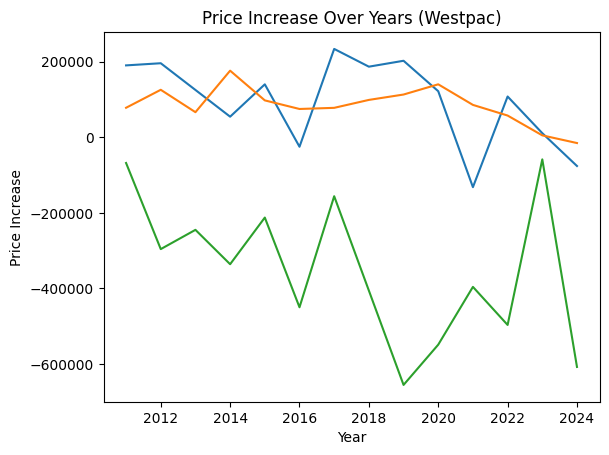

In [132]:
#re-plot the graph

import matplotlib.pyplot as plt
plt.plot(clean_Westpac['Unnamed: 0'], clean_Westpac['Price Increase'])
plt.plot(clean_Bloggs['Unnamed: 0'], clean_Bloggs['Price Increase'])
plt.plot(clean_Spent['Unnamed: 0'], clean_Spent['Price Increase'])
plt.xlabel('Year')
plt.ylabel('Price Increase')
plt.title('Price Increase Over Years (Westpac)')


plt.show()

Note: Now that the data has been cleaned, it is actually proven that the data is actually falling. Although, it is still arguably inaccurate as there are only up to 13 different data in each sample. It would take at least 30 data for an accurate hypothesis testing to prove the accuracy of the fallen predictions.